In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
### importing sicket learn packages
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

### Step 1: Reading and understanding the data

In [4]:
bike_data = pd.read_csv('day.csv')

In [5]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [6]:
bike_data.shape

(730, 16)

In [7]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [8]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


1. Dataset has 730 rows and 16 columns.

2. Except for dteday rest all columns have either integer or float as data type.

3. dteday has data type as object.

4. Few columns looks like categorical,but are in format of int/float.

5. Lets perform analysis on this data set and check whether do we need to convert categorical to int/float.


### Step 2: Data Qulaity Check

Checking Missing values

In [9]:
## Percentage of missing values:Columsn wise check
(bike_data.isnull().mean()/100).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [10]:
#% of missing values:Row wise check
(bike_data.isnull().mean(axis=1)/100).sort_values(ascending=False)

0      0.0
479    0.0
481    0.0
482    0.0
483    0.0
      ... 
245    0.0
246    0.0
247    0.0
248    0.0
729    0.0
Length: 730, dtype: float64

In [11]:
## There are no missing values in the data

Checking for Duplicates

In [12]:
bike_duplicates = bike_data
bike_duplicates.drop_duplicates(inplace=True)
bike_duplicates.shape

(730, 16)

In [13]:
# There are no duplicates in the data

Checking for junk values

In [15]:
bike_junk=bike_data.drop('instant',axis=1)## Since instant is an index column
print("SHAPE of the data is ",bike_junk.shape)
for i in bike_junk:
    print(bike_junk[i].sort_values(ascending=False))
    

SHAPE of the data is  (730, 15)
729    31-12-2019
364    31-12-2018
668    31-10-2019
303    31-10-2018
607    31-08-2019
          ...    
59     01-03-2018
396    01-02-2019
31     01-02-2018
365    01-01-2019
0      01-01-2018
Name: dteday, Length: 730, dtype: object
280    4
335    4
346    4
345    4
344    4
      ..
386    1
385    1
384    1
383    1
729    1
Name: season, Length: 730, dtype: int64
365    1
480    1
482    1
483    1
484    1
      ..
245    0
246    0
247    0
248    0
0      0
Name: yr, Length: 730, dtype: int64
729    12
335    12
337    12
338    12
339    12
       ..
370     1
369     1
368     1
367     1
365     1
Name: mnth, Length: 730, dtype: int64
415    1
359    1
247    1
610    1
512    1
      ..
246    0
248    0
249    0
250    0
729    0
Name: holiday, Length: 730, dtype: int64
0      6
259    6
217    6
224    6
231    6
      ..
344    0
351    0
358    0
609    0
365    0
Name: weekday, Length: 730, dtype: int64
729    1
612    1
370    1


In [16]:
# There are no junk values

###  Exploratory data Analysis

Analysis of ride count average across all the days

In [17]:
bike_data['date'] = bike_data['dteday'].apply(lambda x: int(x.split('-')[0]))
date_dist = round(bike_data.groupby(by='date').cnt.mean()/len(bike_data), 2)
date_dist.head()

date
1    5.92
2    6.01
3    6.37
4    6.41
5    6.23
Name: cnt, dtype: float64

In [18]:
def plot_bar_graph(data, graph_title, x_axis_label, y_axis_label, x_label_rotation=0,x_text=None):
    fig, ax = plt.subplots(figsize=(15,8))
    graph_data = sns.barplot(x=data.index, y=data.values)
    graph_data_label = data.max()*0.01
    for index, value in enumerate(data.iteritems()):
        graph_data.text(index, value[1] + graph_data_label, round(value[1], 2), color='black', ha="center", rotation='horizontal')       
    if x_text is None:
        graph_data.set_xticklabels(graph_data.get_xticklabels(), rotation=x_label_rotation)
    else:
        graph_data.set_xticklabels(x_text, rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 25})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

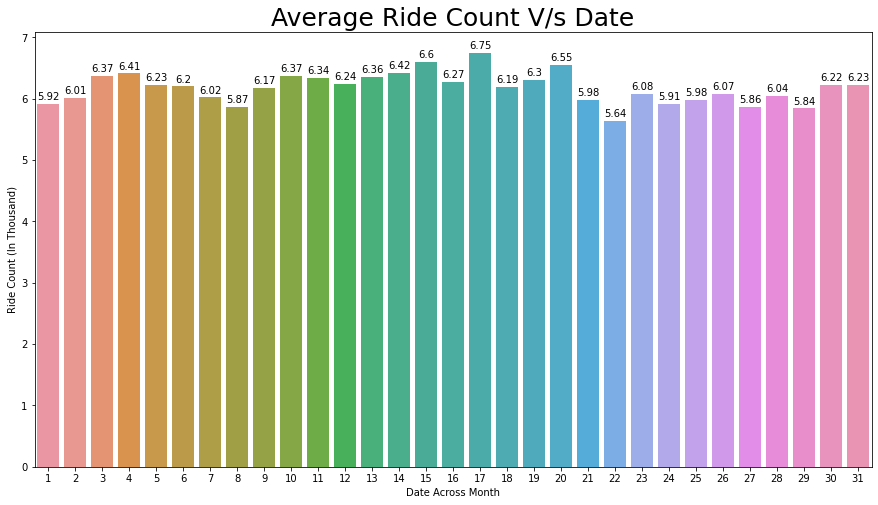

In [19]:
plot_bar_graph(data=date_dist, graph_title='Average Ride Count V/s Date', x_axis_label='Date Across Month',
                        y_axis_label='Ride Count (In Thousand)', x_label_rotation=0)

In [20]:
# The above plot does not give any insights

In [22]:
bike_data.mnth.describe()

count    730.000000
mean       6.526027
std        3.450215
min        1.000000
25%        4.000000
50%        7.000000
75%       10.000000
max       12.000000
Name: mnth, dtype: float64

In [24]:
import datetime
from scipy.stats import pearsonr

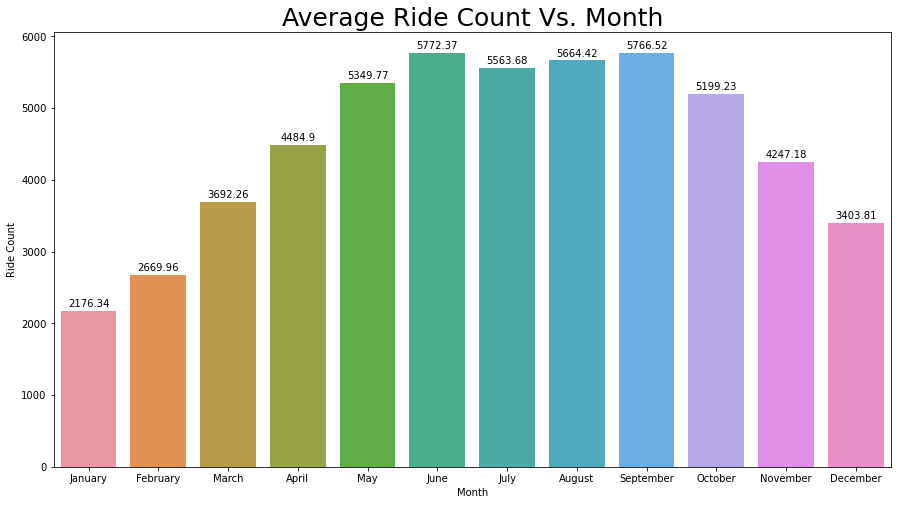

In [25]:
month_dist = bike_data.groupby(by='mnth').cnt.mean()
plot_bar_graph(data=month_dist, graph_title='Average Ride Count Vs. Month', x_axis_label='Month',
                        y_axis_label='Ride Count', x_label_rotation=0,
                        x_text=[datetime.date(1900, i , 1).strftime('%B') for i in range(1, 13)])

In [26]:
#The number of Ride Count drastically increases between May to October

Analysis of ride count average across days of the week

In [27]:
weekday_dist = bike_data.groupby(by='weekday').cnt.mean()

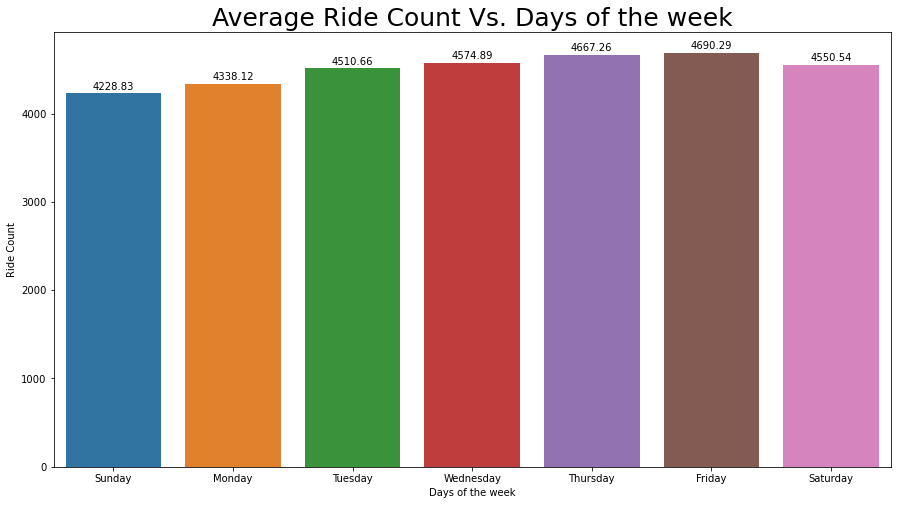

In [28]:
plot_bar_graph(data=weekday_dist, graph_title='Average Ride Count Vs. Days of the week', x_axis_label='Days of the week',
                        y_axis_label='Ride Count', x_label_rotation=0, 
                        x_text=['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

In [29]:
# The number of Ride Count decreases on Sunday as its not a working day.

Impact of Weather on bike ride

In [30]:
bike_data.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
1    463
2    246
3     21
Name: weathersit, dtype: int64

In [31]:
bike_data['weathersit'] = bike_data.weathersit.map({1: 'clear', 2: 'mist', 3: 'light', 4: 'heavy'})
bike_data.groupby(by='weathersit').weathersit.count().sort_values(ascending=False)

weathersit
clear    463
mist     246
light     21
Name: weathersit, dtype: int64

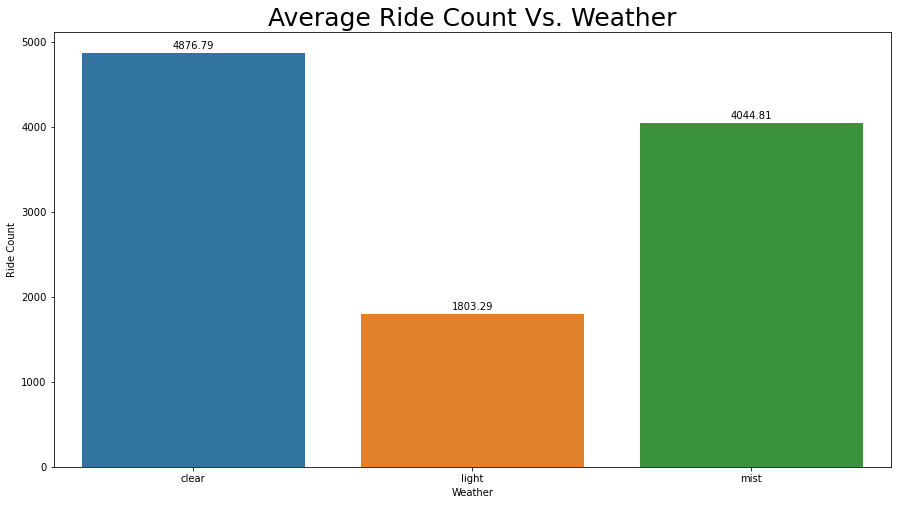

In [32]:
weathersit_dist = bike_data.groupby(by='weathersit').cnt.mean()
plot_bar_graph(data=weathersit_dist, graph_title='Average Ride Count Vs. Weather', x_axis_label='Weather',
                        y_axis_label='Ride Count',  x_label_rotation=0)

In [33]:
## Average ride count high when the weather is clear

In [35]:
bike_data.temp.describe()

count    730.000000
mean      20.319259
std        7.506729
min        2.424346
25%       13.811885
50%       20.465826
75%       26.880615
max       35.328347
Name: temp, dtype: float64

In [36]:
bike_data.hum.describe()

count    730.000000
mean      62.765175
std       14.237589
min        0.000000
25%       52.000000
50%       62.625000
75%       72.989575
max       97.250000
Name: hum, dtype: float64

Text(0.5, 0, 'Temperature')

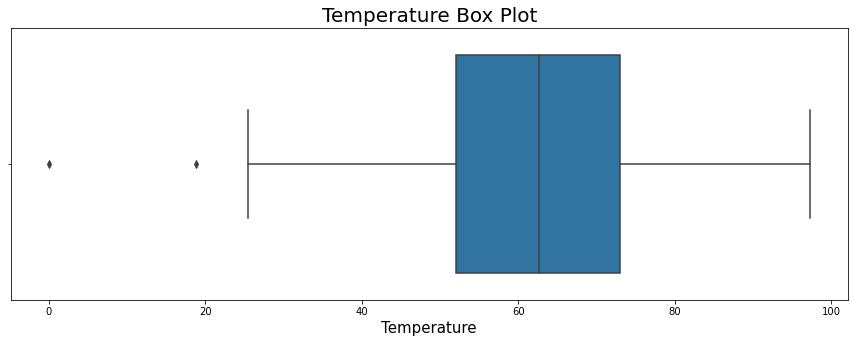

In [37]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=bike_data, x='hum')
plt.title('Temperature Box Plot', fontdict={'fontsize': 20})
plt.xlabel('Temperature', fontdict={'fontsize': 15})

Visualising Numeric Variables

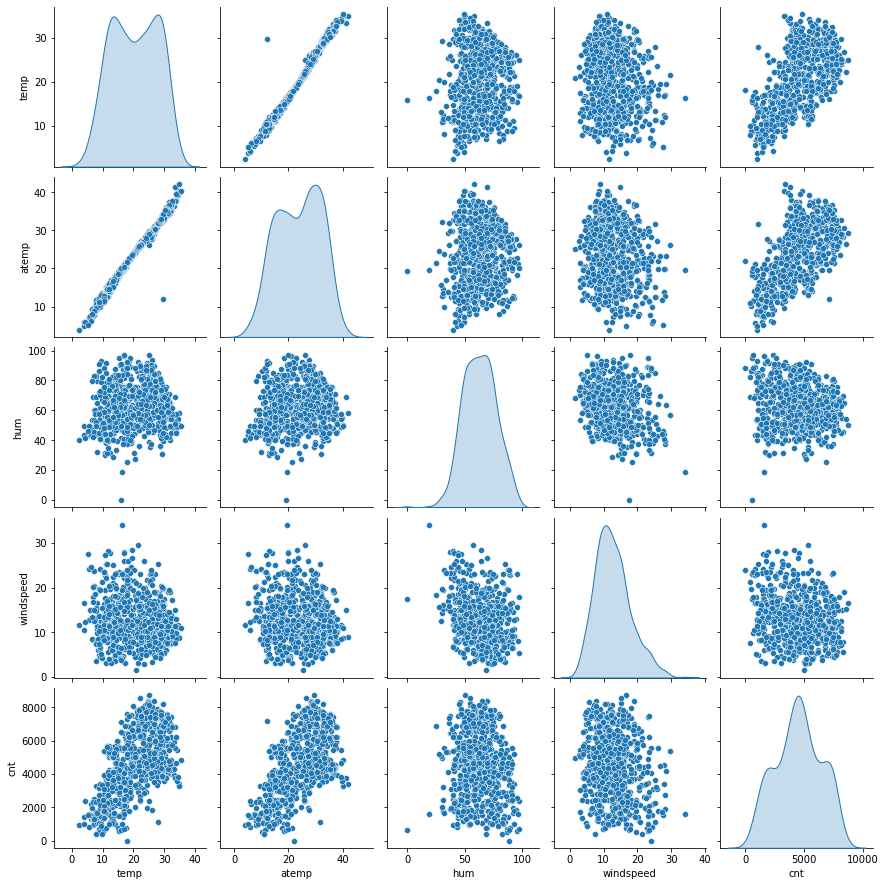

In [38]:
bike_num=bike_data[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

In [39]:
# The above Plot infers that there is a Linear relation between 'temp','atemp' and 'cnt

### Dropping insignificant columns from the dataframe

In [40]:
bike_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'date'],
      dtype='object')

Variables that can be removed from analysis and their reasons are :
1. instant : Its only an index value
2. dteday : This has the date, Since we already have seperate columns for ,'year' & 'month',hence, we could remove this column.
3. casual and registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns. More over, we have created a new variable to have the ratio of these customer types.
4. We will save the new dataframe as bike, so that the original dataset is preserved for any future analysis/validation

In [41]:
bike=bike_data[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,mist,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,clear,9.305237,11.46350,43.6957,12.522300,1600


In [42]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 90.3+ KB


In [43]:
bike.describe()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


### Creating Dummy Variables

In [44]:
# Convert to 'category' data type

bike['season']=bike['season'].astype('category')
bike['weathersit']=bike['weathersit'].astype('category')
bike['mnth']=bike['mnth'].astype('category')
bike['weekday']=bike['weekday'].astype('category')

In [45]:
bike.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 71.4 KB


In [46]:
# 1) Create Dummy variable
# 2) Drop original variable for which the dummy that was created
# 3) Drop first dummy variable for each set of dummies created.(we need only n-1 column if we have n columns)

bike = pd.get_dummies(bike, drop_first=True)


In [47]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                730 non-null    int64  
 1   holiday           730 non-null    int64  
 2   workingday        730 non-null    int64  
 3   temp              730 non-null    float64
 4   atemp             730 non-null    float64
 5   hum               730 non-null    float64
 6   windspeed         730 non-null    float64
 7   cnt               730 non-null    int64  
 8   season_2          730 non-null    uint8  
 9   season_3          730 non-null    uint8  
 10  season_4          730 non-null    uint8  
 11  mnth_2            730 non-null    uint8  
 12  mnth_3            730 non-null    uint8  
 13  mnth_4            730 non-null    uint8  
 14  mnth_5            730 non-null    uint8  
 15  mnth_6            730 non-null    uint8  
 16  mnth_7            730 non-null    uint8  
 1

### SPLITTING THE DATA

In [48]:
# split the data into TRAIN and TEST in 70:30 ratio

In [49]:
bike.shape

(730, 30)

In [86]:
np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.70, random_state = 100)

In [87]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 576 to 520
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                510 non-null    int64  
 1   holiday           510 non-null    int64  
 2   workingday        510 non-null    int64  
 3   temp              510 non-null    float64
 4   atemp             510 non-null    float64
 5   hum               510 non-null    float64
 6   windspeed         510 non-null    float64
 7   cnt               510 non-null    int64  
 8   season_2          510 non-null    uint8  
 9   season_3          510 non-null    uint8  
 10  season_4          510 non-null    uint8  
 11  mnth_2            510 non-null    uint8  
 12  mnth_3            510 non-null    uint8  
 13  mnth_4            510 non-null    uint8  
 14  mnth_5            510 non-null    uint8  
 15  mnth_6            510 non-null    uint8  
 16  mnth_7            510 non-null    uint8  


In [89]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                220 non-null    int64  
 1   holiday           220 non-null    int64  
 2   workingday        220 non-null    int64  
 3   temp              220 non-null    float64
 4   atemp             220 non-null    float64
 5   hum               220 non-null    float64
 6   windspeed         220 non-null    float64
 7   cnt               220 non-null    int64  
 8   season_2          220 non-null    uint8  
 9   season_3          220 non-null    uint8  
 10  season_4          220 non-null    uint8  
 11  mnth_2            220 non-null    uint8  
 12  mnth_3            220 non-null    uint8  
 13  mnth_4            220 non-null    uint8  
 14  mnth_5            220 non-null    uint8  
 15  mnth_6            220 non-null    uint8  
 16  mnth_7            220 non-null    uint8  


In [90]:
df_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_2', 'season_3', 'season_4', 'mnth_2', 'mnth_3', 'mnth_4',
       'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9', 'mnth_10', 'mnth_11',
       'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'weathersit_light', 'weathersit_mist'],
      dtype='object')

Checking Correlation between variables

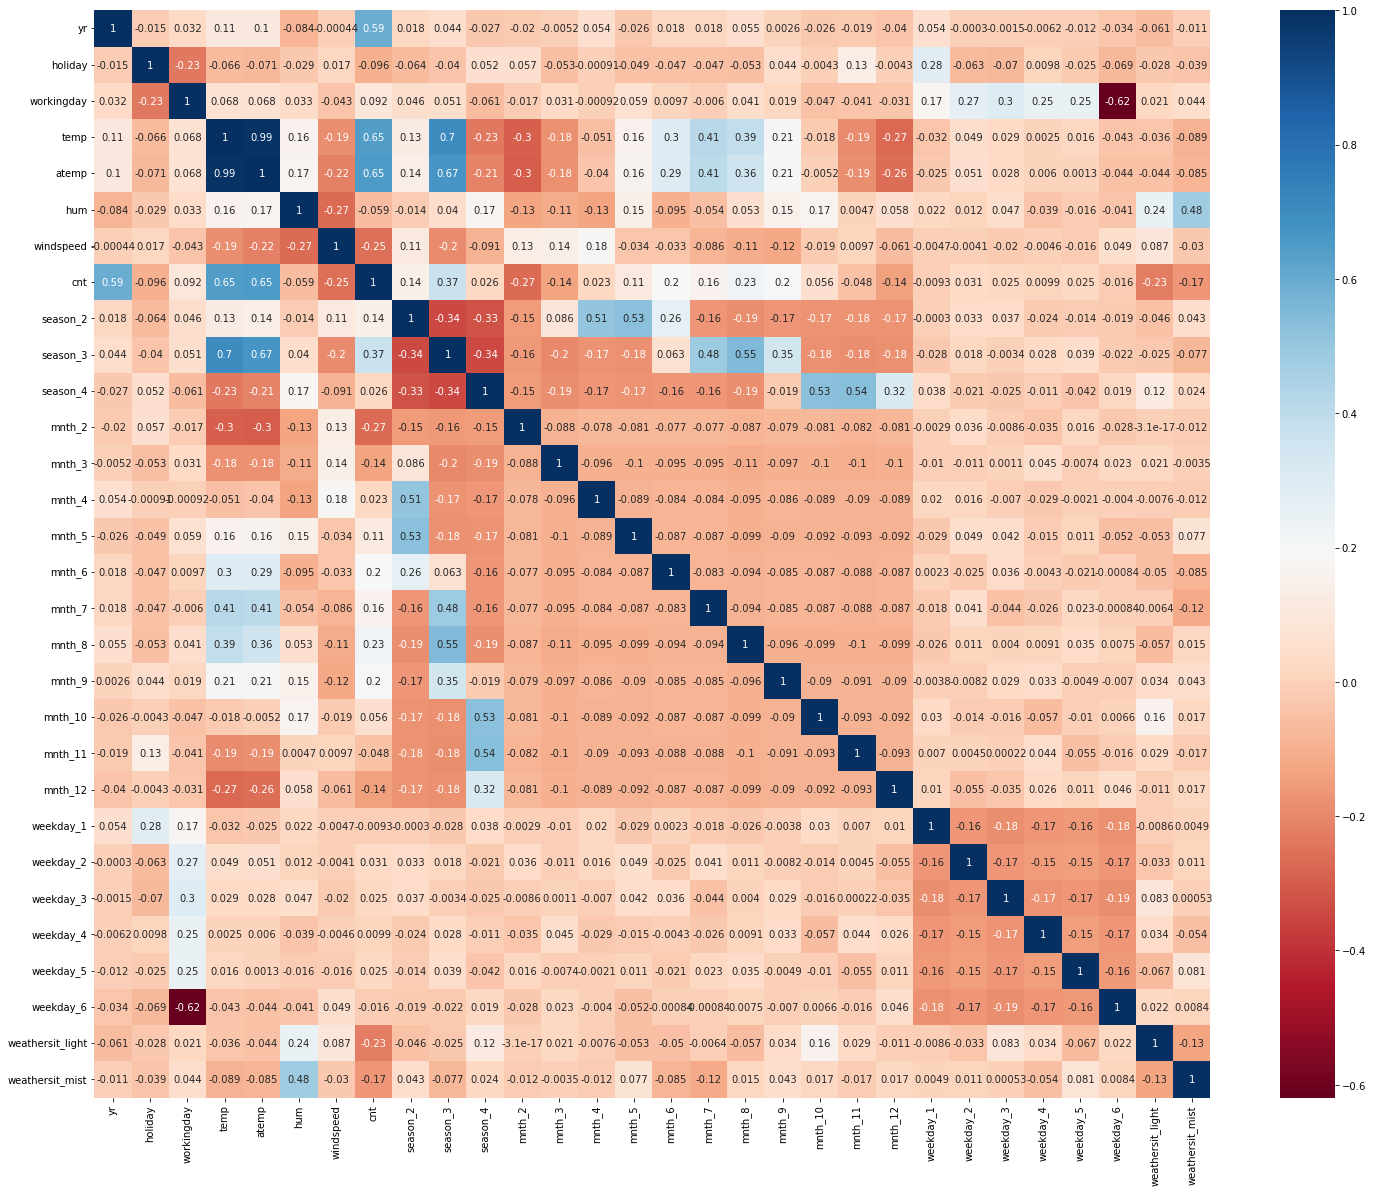

In [91]:
plt.figure(figsize = (25,20))
sns.heatmap(df_train.corr(), annot = True, cmap="RdBu")
plt.show()

1. The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable.
2. We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model

### Normalizing

In [92]:
df_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,0,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,1,0,...,0,0,0,0,0,0,0,1,0,1
111,0,0,1,13.803347,16.0977,72.9583,14.707907,1683,1,0,...,0,0,0,0,0,0,1,0,0,1


In [93]:
scaler = MinMaxScaler()


In [94]:
# Apply scaler() to all the numeric variables

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [95]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,0,0,0,1,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,...,0,0,0,0,0,0,0,1,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,1,0,...,0,0,0,0,0,0,1,0,0,1


In [96]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.247059,0.262745,...,0.086275,0.084314,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.431725,0.440557,...,0.281045,0.278131,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [97]:
# features ['temp', 'atemp', 'hum', 'windspeed','cnt'] got rescaled from original values to 0 and 1's

### LINEAR MODEL BUILDING

In [98]:
# Fixing Trained Target Variable
y_train = df_train.pop('cnt')

In [99]:
#Fixing Trained Feature Variable
X_train = df_train

### Iterative Modeling Process

Using RFE, we will pass an arbitary number (here 15), which means the method will rank first 15 predictors as 1 & remaining as 0. Creating a generalised function for evaluating Variance Inflation Factor

In [100]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [101]:
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [102]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
26,weekday_6,True,1
18,mnth_10,True,1
17,mnth_9,True,1
16,mnth_8,True,1
27,weathersit_light,True,1
9,season_4,True,1
8,season_3,True,1
28,weathersit_mist,True,1
6,windspeed,True,1


RFE method has successfully evaluated top 15 predictors which will impact our outcome. But, we will not rely on this enitirely and continue validating this 15 features manually by building model one by one and elimating any feature which does not satisfy our requirements

#### Model Building -1

In [103]:
col = X_train.columns[rfe.support_]

X_train_rfe = X_train[col]

X_train_sm = sm.add_constant(X_train_rfe)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     183.9
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          5.17e-191
Time:                        11:42:27   Log-Likelihood:                 519.44
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.1
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1952      0.029      6.790      0.000       0.139       0.252
yr                   0.2301      0.008     28.743      0.000       0.214       0.246
holiday             -0.0545      0.027     -2.025      0.043      -0.107      -0.002
workingday           0.0445      0.012      3.856      0.000       0.022       0.067
temp                 0.4972      0.034     14.821      0.000       0.431       0.563
hum                 -0.1639      0.037     -4.395      0.000      -0.237      -0.091
windspeed           -0.1825      0.025     -7.196      0.000      -0.232      -0.133
season_2             0.1183      0.015      8.038      0.000       0.089       0.147
season_3             0.0292      0.022      1.329      0.184      -0.014       0.072
season_4             0.1430      0.013     10.671      0.000       0.117       0.169
mnth_8               0.0473      0.017      2.732      0.007       0.013       0.081
mnth_9               0.1176      0.017      6.876      0.000       0.084       0.151
mnth_10              0.0416      0.017      2.391      0.017       0.007       0.076
weekday_6            0.0531      0.015      3.655      0.000       0.025       0.082
weathersit_light    -0.2507      0.026     -9.579      0.000      -0.302      -0.199
weathersit_mist     -0.0577      0.010     -5.564      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       76.225   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              201.955
Skew:                          -0.743   Prob(JB):                     1.40e-44
Kurtosis:                       5.701   Cond. No.                         21.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
#VIF Check

In [105]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,24.07
4,hum,17.44
7,season_3,8.19
2,workingday,5.05
5,windspeed,3.88
6,season_2,3.46
8,season_4,2.85
14,weathersit_mist,2.15
0,yr,2.04
12,weekday_6,1.91


In above model the p-values are well with in the defined nange but there is higher VIF values for variable "hum", we wll drop these and analyse the model.

#### Model Building -2

In [106]:
col = col.drop(['hum'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr2 = sm.OLS(y_train, X_train_sm)
lr_model_2 = lr2.fit()
lr_model_2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     188.6
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          4.58e-188
Time:                        11:42:32   Log-Likelihood:                 509.66
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     495   BIC:                            -925.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1003      0.019      5.190      0.000       0.062       0.138
yr                   0.2342      0.008     28.911      0.000       0.218       0.250
holiday             -0.0524      0.027     -1.914      0.056      -0.106       0.001
workingday           0.0475      0.012      4.055      0.000       0.025       0.071
temp                 0.4627      0.033     13.931      0.000       0.397       0.528
windspeed           -0.1502      0.025     -6.075      0.000      -0.199      -0.102
season_2             0.1216      0.015      8.124      0.000       0.092       0.151
season_3             0.0425      0.022      1.921      0.055      -0.001       0.086
season_4             0.1390      0.014     10.210      0.000       0.112       0.166
mnth_8               0.0417      0.018      2.374      0.018       0.007       0.076
mnth_9               0.1079      0.017      6.244      0.000       0.074       0.142
mnth_10              0.0391      0.018      2.207      0.028       0.004       0.074
weekday_6            0.0581      0.015      3.940      0.000       0.029       0.087
weathersit_light    -0.2957      0.025    -12.053      0.000      -0.344      -0.247
weathersit_mist     -0.0838      0.009     -9.675      0.000      -0.101      -0.067
==============================================================================
Omnibus:                       77.284   Durbin-Watson:                   2.062
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.987
Skew:                          -0.749   Prob(JB):                     1.13e-45
Kurtosis:                       5.738   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,16.82
6,season_3,7.78
2,workingday,4.45
4,windspeed,3.72
5,season_2,3.42
7,season_4,2.75
0,yr,2.04
8,mnth_8,1.85
11,weekday_6,1.78
10,mnth_10,1.63


In above model, the p-value is higher for variable "mnth_10", we wll drop these and analyse the model.

#### Model building-3

In [108]:
col = col.drop(['mnth_10'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr3 = sm.OLS(y_train, X_train_sm)
lr3_model = lr6.fit()
lr3_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.2
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          3.53e-188
Time:                        11:42:34   Log-Likelihood:                 507.16
No. Observations:                 510   AIC:                            -986.3
Df Residuals:                     496   BIC:                            -927.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0954      0.019      4.949      0.000       0.058       0.133
yr                   0.2336      0.008     28.742      0.000       0.218       0.250
holiday             -0.0548      0.027     -1.996      0.047      -0.109      -0.001
workingday           0.0464      0.012      3.946      0.000       0.023       0.069
temp                 0.4796      0.032     14.784      0.000       0.416       0.543
windspeed           -0.1482      0.025     -5.977      0.000      -0.197      -0.099
season_2             0.1167      0.015      7.853      0.000       0.088       0.146
season_3             0.0356      0.022      1.620      0.106      -0.008       0.079
season_4             0.1499      0.013     11.767      0.000       0.125       0.175
mnth_8               0.0404      0.018      2.290      0.022       0.006       0.075
mnth_9               0.1041      0.017      6.034      0.000       0.070       0.138
weekday_6            0.0570      0.015      3.856      0.000       0.028       0.086
weathersit_light    -0.2888      0.024    -11.824      0.000      -0.337      -0.241
weathersit_mist     -0.0827      0.009     -9.534      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       66.254   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.331
Skew:                          -0.675   Prob(JB):                     9.28e-36
Kurtosis:                       5.402   Cond. No.                         16.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,16.13
6,season_3,7.66
2,workingday,4.39
4,windspeed,3.71
5,season_2,3.35
7,season_4,2.42
0,yr,2.04
8,mnth_8,1.85
10,weekday_6,1.77
12,weathersit_mist,1.55


In [110]:
#high p-value for Season_3 We ll drop this value and analyse further.

#### Model Building-4

In [111]:
col = col.drop(['season_3'])
X_train_rfe = X_train[col]
X_train_sm = sm.add_constant(X_train_rfe)
lr4 = sm.OLS(y_train, X_train_sm)
lr4_model = lr4.fit()
lr4_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     217.0
Date:                Tue, 16 Aug 2022   Prob (F-statistic):          8.64e-189
Time:                        11:42:37   Log-Likelihood:                 505.81
No. Observations:                 510   AIC:                            -985.6
Df Residuals:                     497   BIC:                            -930.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0903      0.019      4.740      0.000       0.053       0.128
yr                   0.2327      0.008     28.651      0.000       0.217       0.249
holiday             -0.0560      0.028     -2.036      0.042      -0.110      -0.002
workingday           0.0463      0.012      3.933      0.000       0.023       0.069
temp                 0.5188      0.022     23.980      0.000       0.476       0.561
windspeed           -0.1508      0.025     -6.085      0.000      -0.200      -0.102
season_2             0.1004      0.011      9.183      0.000       0.079       0.122
season_4             0.1382      0.011     13.148      0.000       0.118       0.159
mnth_8               0.0510      0.016      3.104      0.002       0.019       0.083
mnth_9               0.1136      0.016      6.991      0.000       0.082       0.146
weekday_6            0.0569      0.015      3.842      0.000       0.028       0.086
weathersit_light    -0.2872      0.024    -11.749      0.000      -0.335      -0.239
weathersit_mist     -0.0830      0.009     -9.555      0.000      -0.100      -0.066
==============================================================================
Omnibus:                       61.225   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              141.277
Skew:                          -0.644   Prob(JB):                     2.10e-31
Kurtosis:                       5.234   Cond. No.                         12.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [112]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.20
2,workingday,4.35
4,windspeed,3.60
0,yr,2.02
5,season_2,1.82
9,weekday_6,1.76
7,mnth_8,1.58
11,weathersit_mist,1.54
6,season_4,1.52
8,mnth_9,1.31


### Final Model

According to Hypothesis Testing:
1. Hypothesis testing states that: Null Hypothesis H0:B1=B2=...=Bn=0 (Here co-efficients will be equal to zero)
2. Alternate Hyposthesis H1: at least one B(i) != 0 (Atleast one co-efficients will not be equal to Zero)
3. From the model summary,
  It is evident that all our coefficients are not equal to zero which means WE REJECT THE NULL HYPOTHESIS

In [113]:
lr4_model.params

const               0.090297
yr                  0.232711
holiday            -0.056011
workingday          0.046317
temp                0.518828
windspeed          -0.150835
season_2            0.100362
season_4            0.138202
mnth_8              0.050952
mnth_9              0.113626
weekday_6           0.056927
weathersit_light   -0.287225
weathersit_mist    -0.083049
dtype: float64

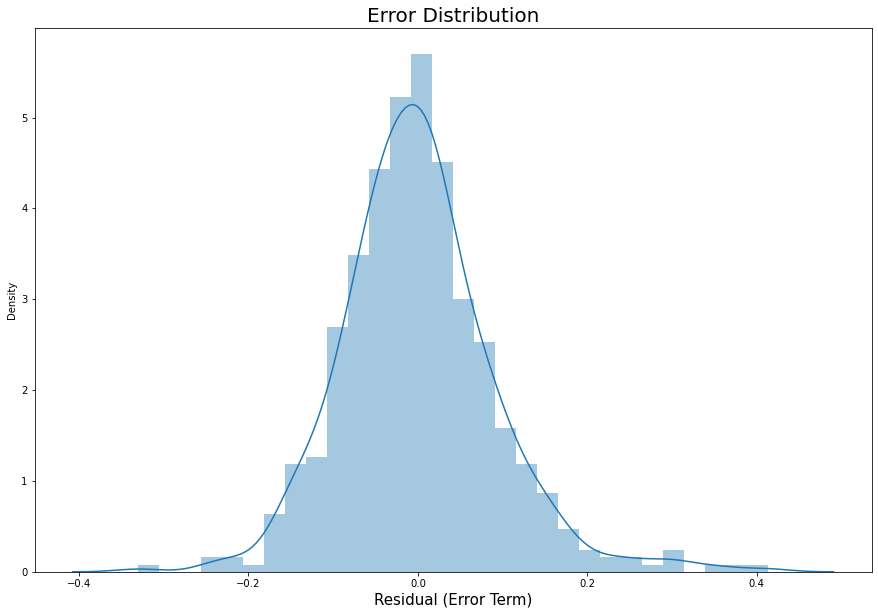

In [114]:
#Residual Analysis of the train data
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
y_train_pred = lr4_model.predict(X_train_sm)
residual = y_train_pred - y_train
plt.xlabel('Residual (Error Term)', fontdict={'fontsize': 15})
plt.title('Error Distribution', fontdict={'fontsize': 20})
sns.distplot(residual,ax=ax)
plt.show()

From the above graph it is evident that Error Distribution Is Normallly Distributed Across 0, which indicates that our model has handled the assumption of Error Normal Distribution properly

In [115]:
# Validating homoscedasticity

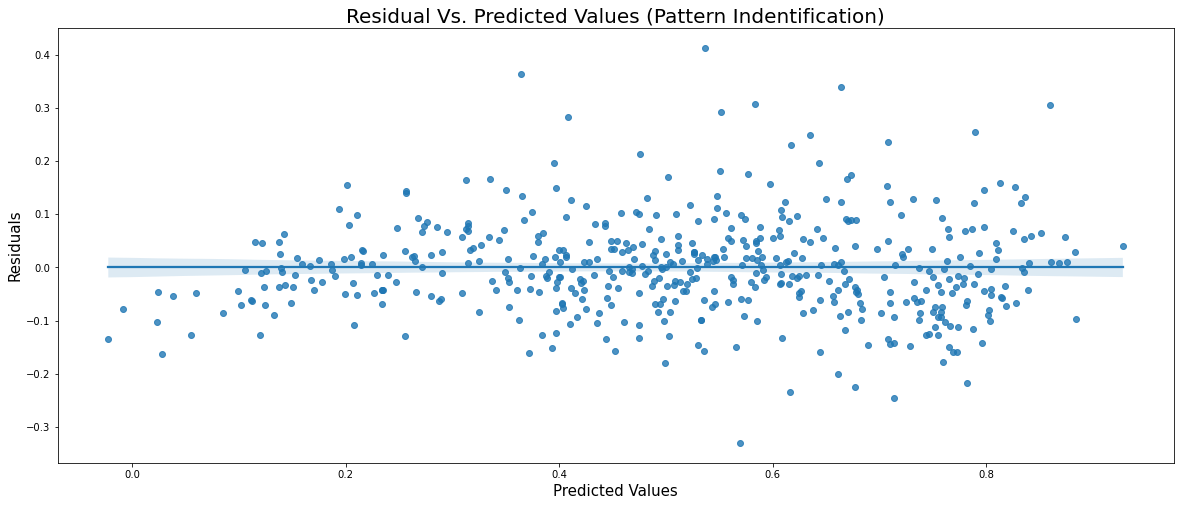

In [116]:
fig_dims = (20, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train_pred, y=residual,ax=ax)
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

In [117]:
print("Pearson Value for Predicted Value Against Residual - ", pearsonr(y_train_pred, residual)[0])

Pearson Value for Predicted Value Against Residual -  1.7468665403086447e-15


In [118]:
#Validating Independence of residuals
print('The Durbin-Watson value for Final Model lr 4 is',round(sm.stats.stattools.durbin_watson((y_train - y_train_pred)),2))

The Durbin-Watson value for Final Model lr 4 is 2.07


From the above graph, we see that there is almost no relation between Residual & Predicted Value. This is what we had expected from our model to have no specific pattern. This describes homoscedasticity

In [119]:
#Validating Linearity

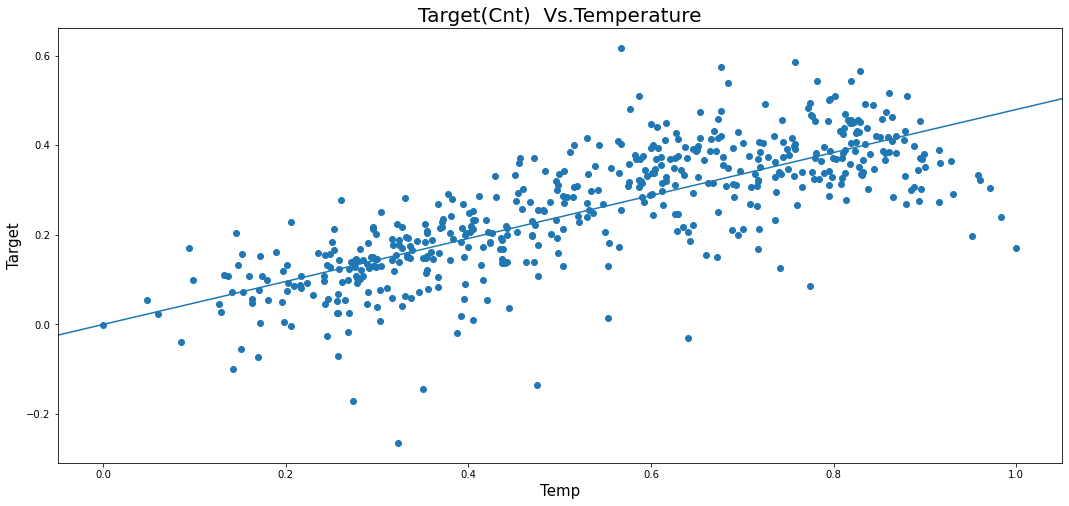

In [120]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr6_model, 'temp',ax=ax)
plt.title('Target(Cnt)  Vs.Temperature', fontdict={'fontsize': 20})
plt.xlabel('Temp', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()

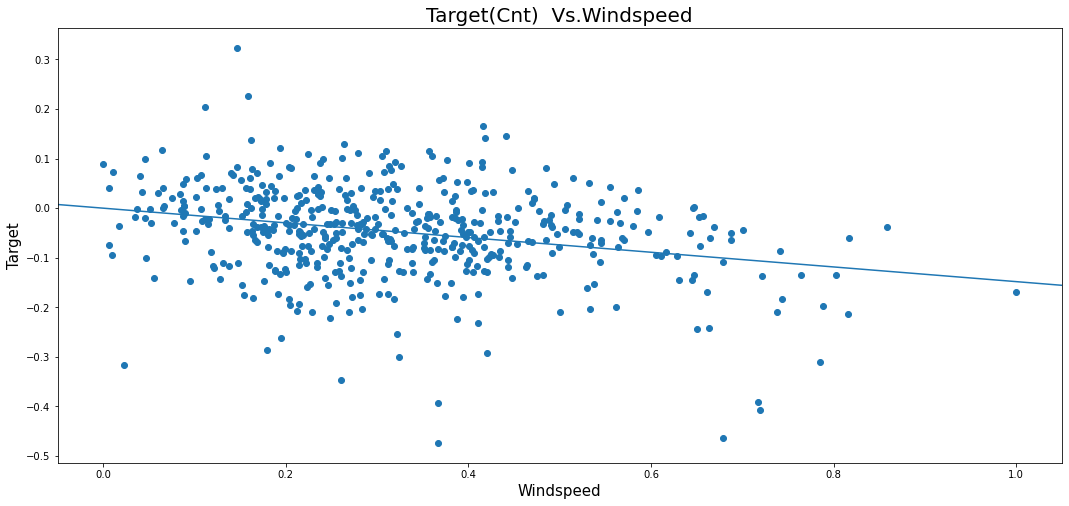

In [121]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sm.graphics.plot_ccpr(lr6_model, 'windspeed', ax=ax)
plt.title('Target(Cnt)  Vs.Windspeed', fontdict={'fontsize': 20})
plt.xlabel('Windspeed', fontdict={'fontsize': 15})
plt.ylabel('Target', fontdict={'fontsize': 15})
plt.show()

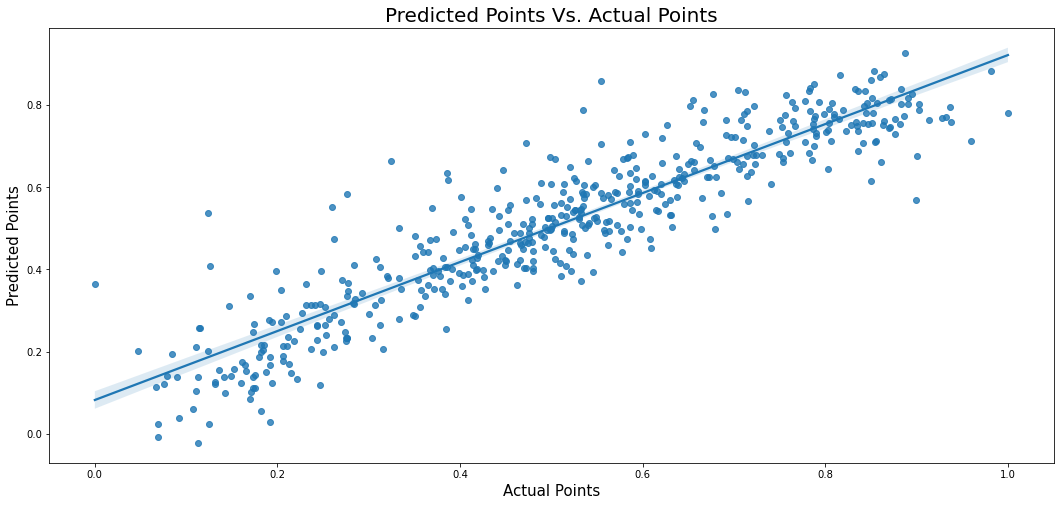

In [122]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(x=y_train, y=y_train_pred, ax=ax)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

From the above graph, we can say that residuals are equal distributed across predicted value.

In [123]:
# Validating Absence of Multicolinearity

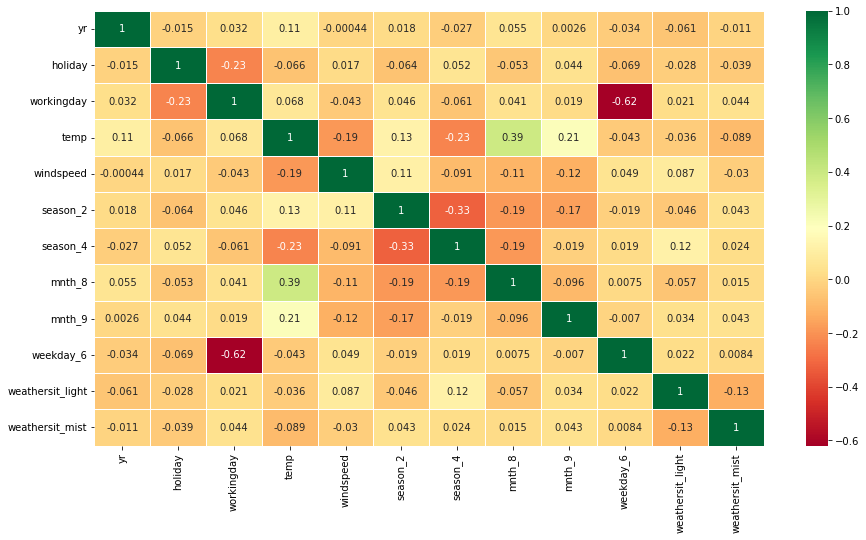

In [124]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn",linewidth =1)
plt.show()

#### R Sqaure Observation for Train Data

In [125]:
from sklearn.metrics import r2_score,mean_squared_error

r2_score(y_train, y_train_pred)

0.8397521567311683

### Predicting on Test Data

In [126]:
num_vars

['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [127]:
df_test[num_vars].head(10)

,temp,atemp,hum,windspeed,cnt
184,29.793347,33.27085,63.7917,5.459106,6043
535,32.082500,36.04875,59.2083,7.625404,6211
299,19.270000,22.85230,81.2917,13.250121,2659
221,31.433347,34.24915,42.4167,13.417286,4780
152,29.315000,32.19710,30.5000,19.583229,4968
404,10.865000,13.09940,56.2083,13.000479,3830
198,30.613347,35.19625,65.1250,14.458868,4458
171,27.914153,31.88230,77.0417,11.458675,4835
512,29.212500,33.96500,67.6250,13.166907,6043
200,31.501653,37.34250,70.7083,7.625739,4332


In [128]:
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,1,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,1,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,1,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,1,0,...,0,0,0,0,0,1,0,0,0,0


In [129]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_light,weathersit_mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.263636,0.245455,...,0.072727,0.086364,0.127273,0.168182,0.100000,0.163636,0.177273,0.118182,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.441609,0.431338,...,0.260281,0.281541,0.334038,0.374881,0.300684,0.370789,0.382770,0.323559,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [130]:
#Fixing Test Target Variable
y_test = df_test.pop('cnt')

In [132]:
# Fixing Test Feature Variable
X_test = df_test

In [133]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   yr                220 non-null    int64  
 1   holiday           220 non-null    int64  
 2   workingday        220 non-null    int64  
 3   temp              220 non-null    float64
 4   atemp             220 non-null    float64
 5   hum               220 non-null    float64
 6   windspeed         220 non-null    float64
 7   season_2          220 non-null    uint8  
 8   season_3          220 non-null    uint8  
 9   season_4          220 non-null    uint8  
 10  mnth_2            220 non-null    uint8  
 11  mnth_3            220 non-null    uint8  
 12  mnth_4            220 non-null    uint8  
 13  mnth_5            220 non-null    uint8  
 14  mnth_6            220 non-null    uint8  
 15  mnth_7            220 non-null    uint8  
 16  mnth_8            220 non-null    uint8  


In [134]:
#Filtering Test Input (Reserving Required Features)
X_test_new = X_test[X_train_rfe.columns]
X_test_new = sm.add_constant(X_test_new)

In [135]:
X_test_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   const             220 non-null    float64
 1   yr                220 non-null    int64  
 2   holiday           220 non-null    int64  
 3   workingday        220 non-null    int64  
 4   temp              220 non-null    float64
 5   windspeed         220 non-null    float64
 6   season_2          220 non-null    uint8  
 7   season_4          220 non-null    uint8  
 8   mnth_8            220 non-null    uint8  
 9   mnth_9            220 non-null    uint8  
 10  weekday_6         220 non-null    uint8  
 11  weathersit_light  220 non-null    uint8  
 12  weathersit_mist   220 non-null    uint8  
dtypes: float64(3), int64(3), uint8(7)
memory usage: 13.5 KB


In [136]:
X_test_new.head()

,const,yr,holiday,workingday,temp,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_light,weathersit_mist
184,1.0,0,1,0,0.831783,0.084219,0,0,0,0,0,0,1
535,1.0,1,0,1,0.901354,0.153728,1,0,0,0,0,0,0
299,1.0,0,0,1,0.511964,0.334206,0,1,0,0,0,0,1
221,1.0,0,0,1,0.881625,0.339570,0,0,1,0,0,0,0
152,1.0,0,0,1,0.817246,0.537414,1,0,0,0,0,0,0


###  Predicting Test Data Using Developed Model

In [137]:
y_pred = lr4_model.predict(X_test_new)

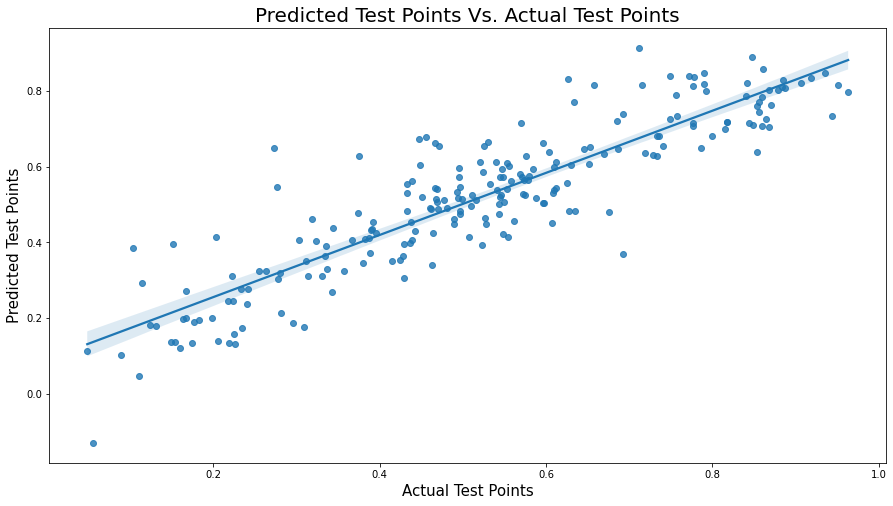

In [138]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
corr_plot = sns.regplot(x=y_test, y=y_pred,ax=ax)
plt.title('Predicted Test Points Vs. Actual Test Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Test Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Test Points', fontdict={'fontsize': 15})
plt.show()

In [139]:
y_pred.head()

184    0.370086
535    0.914147
299    0.406978
221    0.593758
152    0.579924
dtype: float64

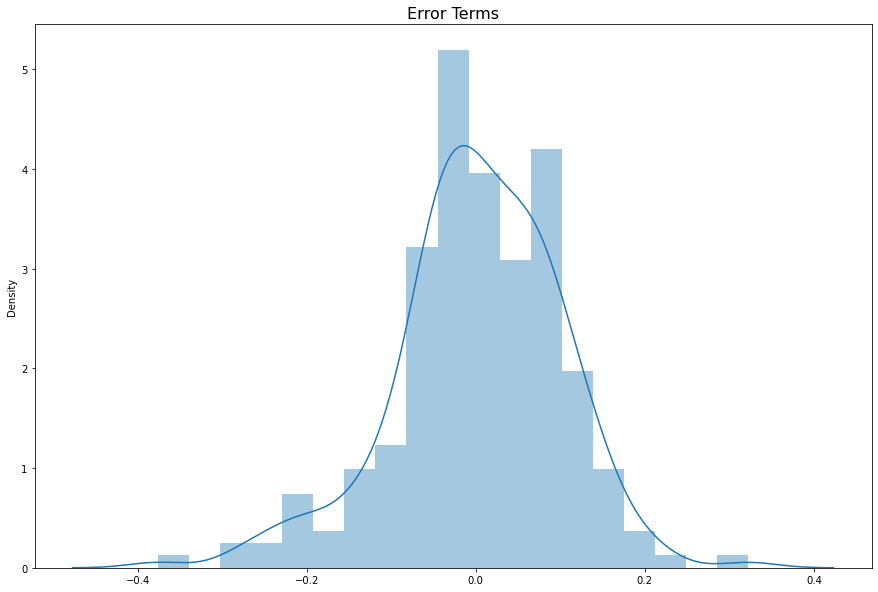

In [140]:
fig_dims = (15, 10)
fig, ax = plt.subplots(figsize=fig_dims)
res_test = y_test - y_pred
plt.title('Error Terms', fontsize=16) 
sns.distplot(res_test)
plt.show()

In [141]:
# distribution plot of error term shows the normal distribution 

In [142]:
r2_score = r2_score(y_test, y_pred)
r2_score

0.7974599854948247

In [144]:
X_test_new.shape

(220, 13)

In [145]:
n= X_test_new.shape[0]
n

220

In [146]:
p = X_test_new.shape[1]
p

13

In [147]:
adjusted_r2 = 1-(1-r2_score)*(n-1)/(n-p-1)
adjusted_r2

0.7846783340940127

In [150]:
# Mean Sqare Error
mse = mean_squared_error(y_test, y_pred)
print('Mean_Squared_Error :' ,round(mse,5))


Mean_Squared_Error : 0.00968


1. Test R^2 :0.7974
2. Test Adjusted R^2 :0.7846
3. This model can 'Generalize' various datasets.

### Conclusions: 

In [151]:
lr4_model.params

const               0.090297
yr                  0.232711
holiday            -0.056011
workingday          0.046317
temp                0.518828
windspeed          -0.150835
season_2            0.100362
season_4            0.138202
mnth_8              0.050952
mnth_9              0.113626
weekday_6           0.056927
weathersit_light   -0.287225
weathersit_mist    -0.083049
dtype: float64

* As per our final Model, the top 3 predictor variables that influences the bike booking are:
1. temp, mnth_9, yr
2. A unit increase in temp(Temperature) variable increase the bike hire numbers by 0.518828 units.
3. A unit increase in mnth_9 variable increase the bike hire numbers by 0.113626 units.
4. A unit increase in yr(Year) variable increase the bike hire numbers by 0.232711 units.
5. So it recommended to give above variables utmost importance while planning to achieve maximum demand.
* Next best variables to be considered:

1. Holiday - A coefficient value of ‘-0.056011’ indicated that a unit increase in holiday variable decreases bike hire numbers by 0.056011 units.
2. windspeed - A coefficient value of ‘-0.150835’ indicated that a unit increase in windspeed variable decreases the bike hire numbers by 0.150835units.


###  The equation of our best fitted line is:
CNT(Target variable) = 0.090297 + (yr × 0.232711) - (holiday × 0.056011 + (temp × 0.518828) − (windspeed × 0.150835) + (season_2 × 0.100362) + (season_4 × 0.138202) + (mnth_8 × 0.050952) +(mnth_9 x 0.113626) +(weekday_6 x 0.056927)− (weathersit_light × 0.287225) − (weathersit_mist × 0.083049)